# Explore the Surface Precipitation Data of VVM Simulations

Before we proceed to apply Single Image [Super Resolution](https://en.wikipedia.org/wiki/Super-resolution_imaging) (SISR) on model output, let's first explore the dataset a little bit, to understand the characterisitcs of the dataset and possible preprocessing procedures required.

## VVM output

We have 2085 cases of VVM surface precipitation stored as `YYYYmmddHHMM.npy`. Let's first explore the general characteristics.

In [5]:
# Set up parameters
#DIRORI = 'D:\\data\\vvm_sprec\\original\\'
#DIR2nd = 'D:\\data\\vvm_sprec\\scale_0.5\\'
#DIR4th = 'D:\\data\\vvm_sprec\\scale_0.25\\'
#DIR8th = 'D:\\data\\vvm_sprec\\scale_0.125\\'
DIRORI = '/home/tsyo/sisrdata/original/'
DIR2nd = '/home/tsyo/sisrdata/scale_0.5/'
DIR4th = '/home/tsyo/sisrdata/scale_0.25/'
DIR8th = '/home/tsyo/sisrdata/scale_0.125/'

import numpy as np
import logging, os
import joblib

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [6]:
# Scan for data
def loadIOTab(srcx, srcy, dropna=False):
    import pandas as pd
    # Scan for input data
    logging.info("Reading input X from: "+ srcx)
    xfiles = []
    for root, dirs, files in os.walk(srcx): 
        for fn in files: 
            if fn.endswith('.npy'): 
                 xfiles.append({'date':fn.replace('.npy',''), 'xuri':os.path.join(root, fn)})
    xfiles = pd.DataFrame(xfiles)
    logging.info("... read input size: "+str(xfiles.shape))
    # Scan for input data
    logging.info("Reading output Y from: "+ srcy)
    yfiles = []
    for root, dirs, files in os.walk(srcy): 
        for fn in files: 
            if fn.endswith('.npy'): 
                 yfiles.append({'date':fn.replace('.npy',''), 'yuri':os.path.join(root, fn)})
    yfiles = pd.DataFrame(yfiles)
    logging.info("... read output size: "+str(yfiles.shape))
    # Create complete IO-data
    iotab = pd.merge(yfiles, xfiles, on='date', sort=True)
    logging.info("... data size after merging: "+str(iotab.shape))
    # Done
    return(iotab)

iotab = loadIOTab(DIR2nd, DIRORI)
iotab2 = loadIOTab(DIR8th, DIR4th)
print(iotab.head())

INFO:root:Reading input X from: /home/tsyo/sisrdata/scale_0.5/
INFO:root:... read input size: (2585, 2)
INFO:root:Reading output Y from: /home/tsyo/sisrdata/original/
INFO:root:... read output size: (2585, 2)
INFO:root:... data size after merging: (2585, 3)
INFO:root:Reading input X from: /home/tsyo/sisrdata/scale_0.125/
INFO:root:... read input size: (2585, 2)
INFO:root:Reading output Y from: /home/tsyo/sisrdata/scale_0.25/
INFO:root:... read output size: (2585, 2)
INFO:root:... data size after merging: (2585, 3)


           date                                           yuri  \
0  200101010000  /home/tsyo/sisrdata/original/200101010000.npy   
1  200101010100  /home/tsyo/sisrdata/original/200101010100.npy   
2  200101010200  /home/tsyo/sisrdata/original/200101010200.npy   
3  200101010300  /home/tsyo/sisrdata/original/200101010300.npy   
4  200101010400  /home/tsyo/sisrdata/original/200101010400.npy   

                                             xuri  
0  /home/tsyo/sisrdata/scale_0.5/200101010000.npy  
1  /home/tsyo/sisrdata/scale_0.5/200101010100.npy  
2  /home/tsyo/sisrdata/scale_0.5/200101010200.npy  
3  /home/tsyo/sisrdata/scale_0.5/200101010300.npy  
4  /home/tsyo/sisrdata/scale_0.5/200101010400.npy  


## Descriptive Statistics

First we want to see some simple statistics of these model output, such as minimal and maximal values, mean, median, percentiles, and variance.

In [7]:
# Function to derive descriptive statistics of a given map
def describe_sprec(furi):
    '''Read in and calculate basic statistics of a VVM surface-precipitation output.'''
    import numpy as np
    # Load data
    data = np.load(furi).flatten()
    # Calculate descriptive statistics
    mean = data.mean()
    sd = data.std()
    maxi = data.max()
    mini = data.min()
    ps = np.percentile(data, [25, 50, 75] )
    # Output
    stats = {'mean': mean, 'std':sd, 'min': mini, 'Q1':ps[0], 'median':ps[1], 'Q3':ps[2], 'max':maxi}
    return(stats)
    
describe_sprec(iotab.yuri.iloc[1])

{'mean': 4.5893692e-05,
 'std': 0.0009121366,
 'min': 0.0,
 'Q1': 0.0,
 'median': 0.0,
 'Q3': 0.0,
 'max': 0.12276868}

In [8]:
# Descriptive statistics of all maps
summary_1024 = []
summary_512 = []
summary_256 = []
summary_128 = []
for i in range(iotab.shape[0]):
    tmp1024 = describe_sprec(iotab.yuri.iloc[i])
    tmp512 = describe_sprec(iotab.xuri.iloc[i])
    tmp256 = describe_sprec(iotab2.yuri.iloc[i])
    tmp128 = describe_sprec(iotab2.xuri.iloc[i])
    tmp1024['date'] = iotab.date.iloc[i]
    tmp512['date'] = iotab.date.iloc[i]
    tmp256['date'] = iotab.date.iloc[i]
    tmp128['date'] = iotab.date.iloc[i]
    summary_1024.append(tmp1024)
    summary_512.append(tmp512)
    summary_256.append(tmp256)
    summary_128.append(tmp128)

import pandas as pd
summary_1024 = pd.DataFrame(summary_1024)
summary_1024.to_csv('data/summary_1024.csv')
summary_512 = pd.DataFrame(summary_512)
summary_512.to_csv('data/summary_512.csv')
summary_256 = pd.DataFrame(summary_256)
summary_256.to_csv('data/summary_256.csv')
summary_128 = pd.DataFrame(summary_128)
summary_128.to_csv('data/summary_128.csv')

print(summary_1024.head())
print(summary_128.head())

       mean       std  min        Q1    median        Q3       max  \
0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1  0.000046  0.000912  0.0  0.000000  0.000000  0.000000  0.122769   
2  0.077088  0.035149  0.0  0.071611  0.086638  0.098298  2.893569   
3  0.035703  0.018038  0.0  0.031495  0.039938  0.046148  2.409692   
4  0.117630  0.084775  0.0  0.052647  0.113113  0.173109  3.714310   

           date  
0  200101010000  
1  200101010100  
2  200101010200  
3  200101010300  
4  200101010400  
       mean       std  min            Q1    median        Q3       max  \
0  0.000000  0.000000  0.0  0.000000e+00  0.000000  0.000000  0.000000   
1  0.000046  0.000504  0.0  3.592272e-08  0.000003  0.000016  0.031899   
2  0.077088  0.032088  0.0  8.017320e-02  0.088501  0.094327  0.180402   
3  0.035703  0.015112  0.0  3.737068e-02  0.041002  0.043419  0.187346   
4  0.117630  0.053714  0.0  1.077280e-01  0.129276  0.148694  0.628468   

           date  
0  20010

----
### Break point

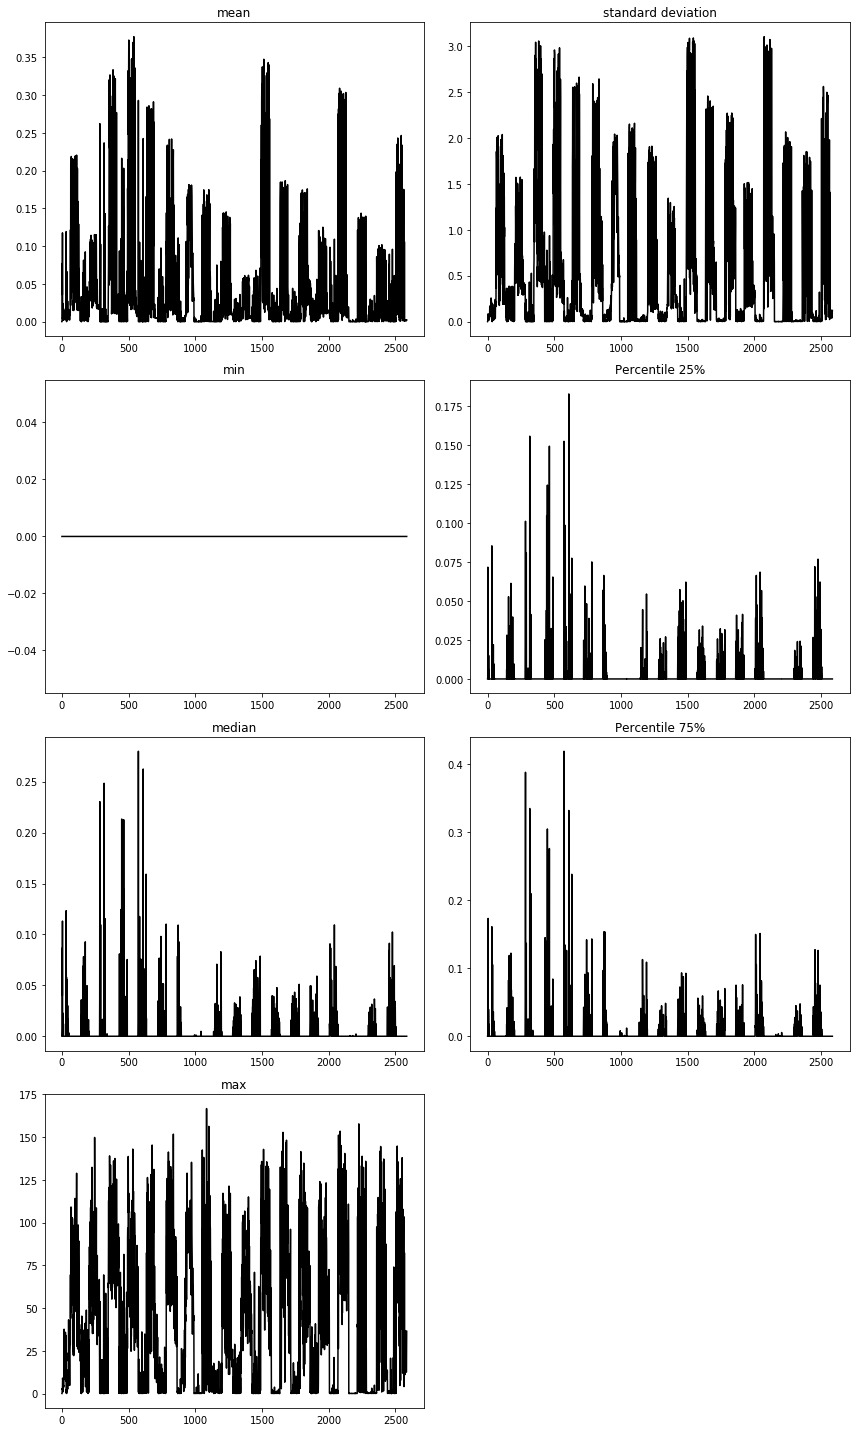

In [9]:
import numpy as np
import pandas as pd

summary_stats = pd.read_csv('data/summary_1024.csv', index_col=0)

# Do some plotting
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,20))
ax = plt.subplot(4, 2, 1)
ax.plot(summary_stats['mean'], ls='-', c='k', label='mean')
ax.set_title('mean')
ax = plt.subplot(4, 2, 2)
ax.plot(summary_stats['std'], ls='-', c='k', label='stdev')
ax.set_title('standard deviation')
ax = plt.subplot(4, 2, 3)
ax.plot(summary_stats['min'], ls='-', c='k', label='min')
ax.set_title('min')
ax = plt.subplot(4, 2, 4)
ax.plot(summary_stats['Q1'], ls='-', c='k', label='p25')
ax.set_title('Percentile 25%')
ax = plt.subplot(4, 2, 5)
ax.plot(summary_stats['median'], ls='-', c='k', label='median')
ax.set_title('median')
ax = plt.subplot(4, 2, 6)
ax.plot(summary_stats['Q3'], ls='-', c='k', label='p75')
ax.set_title('Percentile 75%')
ax = plt.subplot(4, 2, 7)
ax.plot(summary_stats['max'], ls='-', c='k', label='max')
ax.set_title('max')

plt.tight_layout()
plt.show()

From the figures above, we observed:

- There are about 18 cycles in this 2585 time-stamps
- The minimal values are always 0s
- The max values are very much larger than 75% percentile, which implied:
  - There are a few extreme values in each map
  - Most points in maps are 0s or low values


And then we need to ask the question:

- When combine high-resolution grids into a low-resolution grid, do we use *average*, *maximum*, or other statistics?
- What is the relationship of precipitation between a GCM scale model and a cloud-resolving scale model? (same as the previous question)


## Spatial Patterns

Let's do some PCA to see the major spatial variations.

In [10]:
from sklearn.decomposition import PCA, IncrementalPCA

def load_sprec(flist, to_log=False):
    ''' Load a list a surface precipitation files (in npy format) into one numpy array. '''
    xdata = []
    for f in flist:
        tmp = np.load(f)
        # Append new record
        if tmp is not None:            # Append the flattened data array if it is not None
            xdata.append(tmp.flatten())
    x = np.array(xdata, dtype=np.float32)
    # Convert to log space if specified
    if to_log:
        x = np.log(x+1)
    # done
    return(x)


''' Perform Incremental PCA '''
def fit_ipca_partial(finfo, nc=100, bs=200, log_flag=False):
    nrec = finfo.shape[0]
    # Initialize the IncrementalPCA object
    ipca = IncrementalPCA(n_components=nc, batch_size=bs)
    # Check whether the last batch size is smaller than n_components
    flag_merge_last_batch = False
    if np.mod(nrec, bs)<nc:
        logging.warning('The last batch is smaller than n_component, merge the last two batches.')
        flag_merge_last_batch = True
    # Setup batch counter
    n_batch = int(np.floor(nrec/bs))
    if not flag_merge_last_batch:
        n_batch = n_batch + 1
    logging.info('Number of batches: '+str(n_batch))
    # Loop through the first (n_batch-1) batch
    for i in range(n_batch-1):
        # Read batch data
        i1 = i * bs
        i2 = i1 + bs
        # Load batch data
        data = load_sprec(finfo['yuri'].iloc[i1:i2], to_log=log_flag)
        logging.info('Batch dimension: '+ str(data.shape))
        # Partial fit with batch data
        ipca.partial_fit(data)
    # In case there is only one batch
    if n_batch==1:
        i2 = 0
    # Fit the last batch
    data = load_sprec(finfo['yuri'].iloc[i2:nrec], to_log=log_flag)
    logging.info('Final batch dimension: '+ str(data.shape))
    ipca.partial_fit(data)
    # done
    return(ipca)


In [11]:
# Fit incremental PCA model
ipca = fit_ipca_partial(iotab, nc=10, bs=100, log_flag=False)

INFO:root:Number of batches: 26
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
INFO:root:Batch dimension: (100, 1048576)
IN

In [12]:
# Summarize results
ev = ipca.explained_variance_
evr = ipca.explained_variance_ratio_
cevr = np.cumsum(evr)
com = np.transpose(ipca.components_)
print("Explained variance ratio: "+ str(evr))
print("Cumulative explained variance ratio: "+ str(cevr))

Explained variance ratio: [0.09405374 0.03451984 0.02075127 0.01918985 0.01509003 0.01315098
 0.01149847 0.01125735 0.01085849 0.01025956]
Cumulative explained variance ratio: [0.09405374 0.12857358 0.14932485 0.1685147  0.18360473 0.19675571
 0.20825418 0.21951153 0.23037002 0.24062958]


In [13]:
with open("sprec1024.pca.joblib", 'wb') as outfile:
    joblib.dump(ipca, outfile)

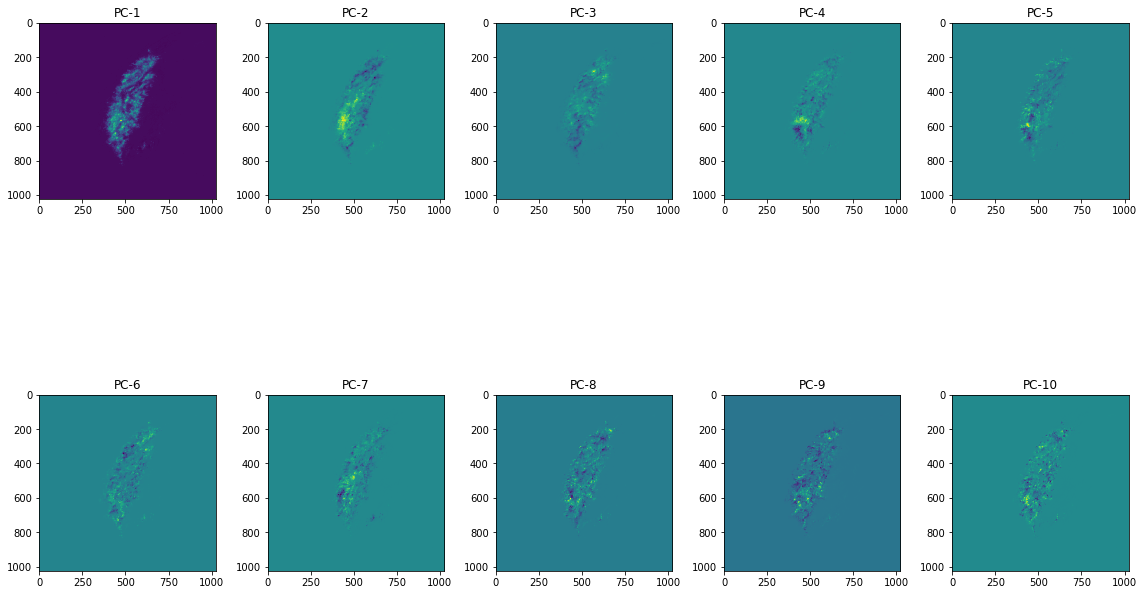

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(np.flipud(ipca.components_[i,:].reshape(1024,1024)))
    im = ax.set_title('PC-'+str(i+1))
    #plt.colorbar(im, ax=ax[1, i])

plt.tight_layout()
plt.show()